# House Prices - Advanced Regression Techniques
This notebook is aimed to build a price prediction model for residential homes in Ames, Iowa, based on 79 explanatory variables of each home.

In [1]:
import numpy as np
import pandas as pd

## Acquiring data
The train/test data are provided. 

`data_description.txt` provides full description of each column.

There is also a file named `sample_submission.csv`, but this is just a sample of submission file so we will not used it for modeling.

In [2]:
train_data = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
test_data = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

sample_data = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv")

f = open("../input/house-prices-advanced-regression-techniques/data_description.txt")

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
sample_data.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [6]:
datalist = f.readlines()
for data in datalist:
    print(data, end='')

f.close()

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

<AxesSubplot:ylabel='Frequency'>

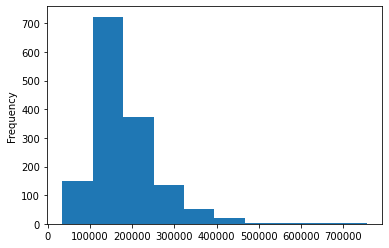

In [7]:
train_data['SalePrice'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

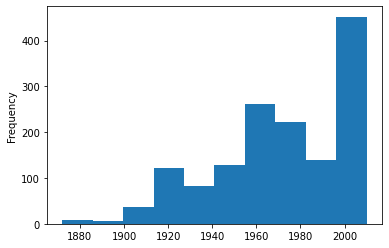

In [8]:
train_data['YearBuilt'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

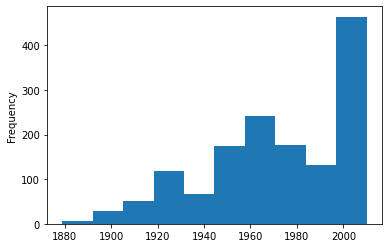

In [9]:
test_data['YearBuilt'].plot(kind='hist')

In [10]:
train_data['YearBuilt'].max()

2010

In [11]:
test_data['YearBuilt'].max()

2010

In [12]:
train_data['BuildingAge'] = 2010 - train_data['YearBuilt']
test_data['BuildingAge'] = 2010 - test_data['YearBuilt']

In [13]:
train_data.drop('YearBuilt', axis=1, inplace=True)
test_data.drop('YearBuilt', axis=1, inplace=True)

In [14]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

train_data.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
Alley               2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          4
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        637
BsmtFinType2        6
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          753
2ndFlrSF          417
LowQualFinSF       24
GrLivArea 

<AxesSubplot:>

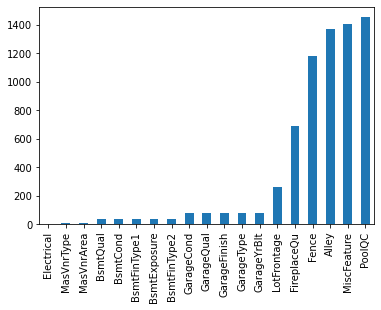

In [15]:
missing = train_data.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

In [16]:
test_data.nunique()

Id               1459
MSSubClass         16
MSZoning            5
LotFrontage       115
LotArea          1106
Street              2
Alley               2
LotShape            4
LandContour         4
Utilities           1
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          5
BldgType            5
HouseStyle          7
OverallQual        10
OverallCond         9
YearRemodAdd       61
RoofStyle           6
RoofMatl            4
Exterior1st        13
Exterior2nd        15
MasVnrType          4
MasVnrArea        303
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        669
BsmtFinType2        6
BsmtFinSF2        161
BsmtUnfSF         793
TotalBsmtSF       736
Heating             4
HeatingQC           5
CentralAir          2
Electrical          4
1stFlrSF          789
2ndFlrSF          407
LowQualFinSF       15
GrLivArea 

In [17]:
train_data['is_test_data'] = False
test_data['is_test_data'] = True
merged_data = pd.concat([train_data, test_data])
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [18]:
# Get dummy variables for object type columns
dummy_merged_data = pd.get_dummies(merged_data)

# Get dummy variables for int type columns
dummy_columns = ['MSSubClass','MoSold','YrSold']
dummy_merged_data = pd.get_dummies(dummy_merged_data, columns=dummy_columns)

In [19]:
dummy_merged_data.head()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,BuildingAge,is_test_data,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,Gar

In [20]:
dummy_merged_data.fillna(0, inplace=True)

In [21]:
train_data.cov()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,BuildingAge,is_test_data
Id,177755.000000,198.968472,-108.390207,-1.398197e+05,-16.539068,5.915696,-191.474297,-3.842688e+03,-9.661021e+02,-405.884167,-1.479131e+03,-2.851118e+03,1.710742e+03,1.028782e+03,-906.713160,1.832811e+03,0.500685,-2.028787,1.297807,1.438314,12.972927,0.274160,18.666210,-5.373886,0.752557,5.220699,1.589549e+03,-1.566468e+03,-1.332214e+01,74.450651,-576.428376,31.270391,966.275531,-1305.726525,24.133653,0.398561,-7.340732e+05,1.618818e+02,0.0
MSSubClass,198.968472,1789.338306,-404.439075,-5.901742e+04,1.908771,-2.792117,35.439934,1.758378e+02,-1.347356e+03,-447.979166,-2.630967e+03,-4.426302e+03,-4.116975e+03,5.685234e+03,95.586483,1.663845e+03,0.076629,-0.023557,3.067005,3.772743,-0.808797,2.625762,2.776334,-1.242665,86.172938,-1.267945,-8.923920e+02,-6.669453e+01,-1.709661e+01,-31.119180,-54.348569,-61.394007,14.076652,-161.243759,-1.553607,-1.202630,-2.832337e+05,-3.558134e+01,0.0
LotFrontage,-108.390207,-404.439075,589.749169,8.199814e+04,8.673047,-1.573935,45.744675,8.712074e+02,2.635953e+03,187.215374,1.445359e+03,4.268527e+03,4.288431e+03,8.472613e+02,47.977276,5.183670e+03,1.271142,-0.041039,2.661649,0.649849,5.177661,-0.034248,13.934064,4.069732,44.022081,5.397615,1.853024e+03,2.587889e+02,2.438681e+02,16.022614,48.936214,56.264418,194.586364,15.520479,0.735389,0.240700,7.124262e+05,-9.510848e+01,0.0
LotArea,-139819.667238,-59017.418634,81998.138404,9.962565e+07,1460.548271,-62.602871,2841.343594,1.884014e+05,9.746908e+05,179002.233638,-1.154799e+04,1.142145e+06,1.155563e+06,2.221512e+05,2319.328975,1.380033e+06,819.143085,114.495162,693.021818,71.574436,974.574692,-39.111247,3082.701145,1746.115056,-6291.693689,1155.203940,3.849872e+05,2.148006e+05,5.606253e+04,-11188.088772,5976.210971,24020.024881,31148.209380,188508.749657,32.517342,-189.050203,2.092111e+08,-4.289113e+03,0.0
OverallQual,-16.539068,1.908771,8.673047,1.460548e+03,1.912679,-0.141484,15.723417,1.030121e+02,1.511770e+02,-13.189617,1.883161e+02,3.263034e+02,2.546128e+02,1.783942e+02,-2.046234,4.309608e+02,0.079730,-0.013257,0.419510,0.190187,0.114713,-0.056034,0.960876,0.353744,18.200588,0.620814,1.661850e+02,4.141573e+01,2.829764e+01,-9.630806,1.231398,5.003537,3.620945,-21.548945,0.264785,-0.050229,8.690413e+04,-2.390622e+01,0.0
OverallCond,5.915696,-2.792117,-1.573935,-6.260287e+01,-0.141484,1.238322,1.694152,-2.581896e+01,-2.346427e+01,7.221779,-6.728577e+01,-8.352827e+01,-6.203526e+01,1.405917e+01,1.379440,-4.659665e+01,-0.031726,0.031303,-0.119025,-0.034007,0.011783,-0.021332,-0.104153,-0.017088,-8.655597,-0.154478,-3.605025e+01,-4.649741e-01,-2.402762e+00,4.785160,0.832039,3.400819,-0.088745,37.970669,-0.010563,0.064953,-6.882739e+03,1.263671e+01,0.0
YearRemodAdd,-191.474297,35.439934,45.744675,2.841344e+03,15.723417,1.694152,426.232822,6.716764e+02,1.209533e+03,-225.669866,1.652391e+03,2.636254e+03,1.918530e+03,1.261937e+03,-62.658995,3.117808e+03,1.279895,-0.060811,4.993662,1.903389,-0.683467,-0.680515,6.434195,1.498390,324.207040,6.489620,1.640274e+03,5.323509e+02,3.095486e+02,-244.692937,27.410061,-44.594964,4.835329,-105.358566,1.199517,0.980046,8.317079e+05,-3.696755e+02,0.0
MasVnrArea,-3842.687941,175.837842,871.207424,1.884014e+05,103.012054,-25.818956,671.676358,3.278497e+04,2.182760e+04,-2117.724160,9.160661e+03,2.887054e+04,2.401646e+04,1.379245e+04,-609.749372,3.719917e+04,8.013483,1.156057,27.580387,18.334504,15.169714,-1.494771,82.639813,29.017093,1151.316421,49.359527,1.446283e+04,3.626330e+03,1.503301e+03,-1218.999064,100.044636,622.125969,85.516034,-2685.666442,-2.915638,-1.973363,6.854858e+06,-1.725993e+03,0.0
BsmtFi

In [22]:
train_data = dummy_merged_data[dummy_merged_data['is_test_data']==False]
test_data = dummy_merged_data[dummy_merged_data['is_test_data']==True]

In [23]:
train_data = train_data.drop('is_test_data', axis=1)
test_data = test_data.drop('is_test_data', axis=1)

In [24]:
X_train = train_data.drop('SalePrice', axis=1)
y_train = train_data['SalePrice']

X_test = test_data.drop('SalePrice', axis=1)
y_test = test_data['SalePrice']

In [25]:
# Import libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

# Train model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [26]:
pred_y_test = lr.predict(X_test)

In [27]:
pred_y_test

array([114173.51861331, 169692.07255122, 187872.63763454, ...,
       177671.19409636, 116081.64006152, 224416.97908915])

In [28]:
result = pd.DataFrame(columns=['Id', 'SalePrice'])

In [29]:
result['SalePrice'] = pd.Series(pred_y_test)

In [30]:
result['Id'] = test_data['Id']

In [31]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         1459 non-null   int64  
 1   SalePrice  1459 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 22.9 KB


In [32]:
result.to_csv('submission.csv', index=False)